### Employee Promotion Evaluation

#### Problem Statement
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.	They first identify a set of employees based on recommendations/ past performance
2.	Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3.	At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

#### Attribute description
employee_id -	Unique ID for employee <br/>
department - Department of employee <br/>
region	- Region of employment (unordered)<br/>
education -	Education Level<br/>
gender	- Gender of Employee<br/>
recruitment_channel	- Channel of recruitment for employee<br/>
no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.<br/>
age	- Age of Employee<br/>
previous_year_rating -	Employee Rating for the previous year<br/>
length_of_service -	Length of service in years<br/>
KPIs_met >80%	- if Percent of KPIs(Key performance Indicators) >80% then 1 else 0<br/>
awards_won?	- if awards won during previous year then 1 else 0<br/>
avg_training_score -	Average score in current training evaluations<br/>
is_promoted	(Target) - Recommended for promotion<br/>


#### Importing Packages

In [164]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
os.getcwd();

In [165]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)

In [166]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [167]:
# When you are trying to import from the local machine
# emp_data = pd.read_csv('train.csv')

# from google.colab import files
# upload = files.upload()



In [168]:
import io
# emp_data = pd.read_csv(io.BytesIO(upload['attachment_train_lyst4523.csv']))
emp_data = pd.read_csv('attachment_train_lyst4523.csv')

In [169]:
emp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [170]:
emp_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

### Question: Perform Descriptive Statistics on the dataset 

In [171]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [172]:
emp_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Question: Remove missing values from the data frame

In [173]:
emp_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

As we can see the education and previous_year_rating fields are having missing values

In [174]:

'''
This function is to drop the columns which are having missing values more than the percentage passed
'''
columns = emp_data.columns
percent_missing = emp_data.isnull().sum() * 100 / len(emp_data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})


'\nThis function is to drop the columns which are having missing values more than the percentage passed\n'

In [175]:
missing_value_df

,percent_missing
employee_id,0.000000
department,0.000000
region,0.000000
education,4.395344
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.524449
length_of_service,0.000000


Using the interpolate function to fill the missing values

In [176]:
emp_data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [177]:
# emp_data['education'].fillna("Bachelor's", axis=1)
emp_data['education'].replace(np.nan, "Bachelor's", inplace= True)

In [178]:
emp_data['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [179]:
emp_data['previous_year_rating'].replace(np.nan, "3.0", inplace= True)

In [180]:
emp_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [181]:
emp_data.rename(columns={'KPIs_met >80%':'KPIs_met_80%', 'awards_won?': 'awards_won'}, inplace=True)

### Question: Perform EDA and find any correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BC5270828>,
      dtype=object)

[]

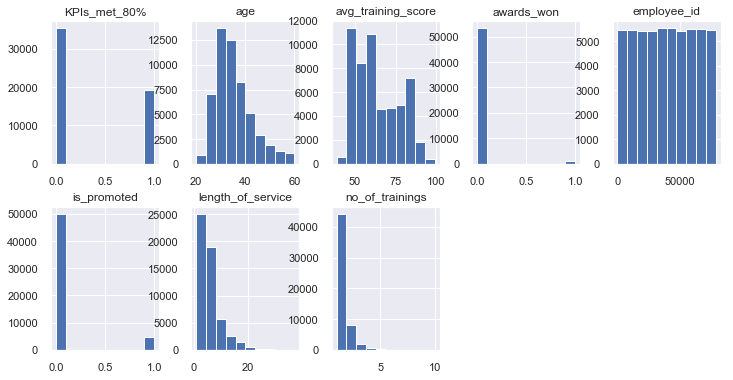

In [182]:
# sns.distplot(emp_data.select_dtypes(include=['float64','int64']), hist=False, color="g", kde_kws={"shade": True})
emp_data.hist(bins=10, figsize=(12,30), layout=(9,5))
plt.plot()

In [183]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null object
length_of_service       54808 non-null int64
KPIs_met_80%            54808 non-null int64
awards_won              54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(8), object(6)
memory usage: 5.9+ MB


In [184]:
for col in emp_data.columns:
    print("=============== " + str(col) +" Start===============")
    print("\nUnique values :: " + str(emp_data[col].nunique()))
    print("\nMissing values Count:: " + str(emp_data[col].isnull().sum()))
    print("\nUnique Values Count:: \n" + str(emp_data[col].value_counts()))
    print("=============== " + str(col) +" End===============")
      

=============== employee_id Start===============

Unique values :: 54808

Missing values Count:: 0

Unique Values Count:: 
2047     1
19228    1
4887     1
6934     1
789      1
15122    1
11024    1
56078    1
49933    1
51980    1
58121    1
60168    1
39686    1
33541    1
35588    1
47874    1
43776    1
70391    1
66293    1
74481    1
19164    1
31450    1
27352    1
4823     1
6870     1
25369    1
17181    1
2772     1
21279    1
17245    1
        ..
48573    1
36283    1
40377    1
62964    1
65013    1
60919    1
30244    1
63028    1
52787    1
11823    1
15917    1
13868    1
1578     1
7721     1
28199    1
26150    1
32293    1
20003    1
38392    1
17954    1
24097    1
22048    1
77327    1
69131    1
67082    1
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64
=============== employee_id End===============
=============== department Start===============

Unique values :: 9

Missing values Count:: 0

Unique Values Cou

In [185]:
#Dummification 
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null object
length_of_service       54808 non-null int64
KPIs_met_80%            54808 non-null int64
awards_won              54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: int64(8), object(6)
memory usage: 5.9+ MB


### Question: Perform classification using Support Vector Machines Algorithm and analyse the metrics

In [186]:
emp_data_cat = emp_data.select_dtypes(include=['object'])

In [187]:
emp_data_cat


,department,region,education,gender,recruitment_channel,previous_year_rating
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5
1,Operations,region_22,Bachelor's,m,other,5
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3
3,Sales & Marketing,region_23,Bachelor's,m,other,1
4,Technology,region_26,Bachelor's,m,other,3
5,Analytics,region_2,Bachelor's,m,sourcing,3
6,Operations,region_20,Bachelor's,f,other,3
7,Operations,region_34,Master's & above,m,sourcing,3
8,Analytics,region_20,Bachelor's,m,other,4
9,Sales & Marketing,region_1,Master's & above,m,sourcing,5


Applying the dummification for the categorical 

In [188]:
for col in emp_data_cat.columns:
    y_dummies = pd.get_dummies(emp_data[col], prefix=col, drop_first= False)
    emp_data = pd.concat([emp_data, y_dummies], axis=1)
    emp_data.drop([col], axis=1, inplace=True)


In [189]:
emp_data


,employee_id,no_of_trainings,age,length_of_service,KPIs_met_80%,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.0
0,65438,1,35,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,65141,1,30,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
2,7513,1,34,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2542,2,39,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,48945,1,45,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
5,58896,2,31,7,0,0,85,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6,20379,1,31,5,0,0,59,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
7,16290,1,33,6,0,0,63,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
8,73202,1,28,5,0,0,83,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
9,28911,1,32,5,1,0,54,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [190]:
emp_data.drop(['employee_id'], axis=1, inplace=True)

In [191]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 64 columns):
no_of_trainings                 54808 non-null int64
age                             54808 non-null int64
length_of_service               54808 non-null int64
KPIs_met_80%                    54808 non-null int64
awards_won                      54808 non-null int64
avg_training_score              54808 non-null int64
is_promoted                     54808 non-null int64
department_Analytics            54808 non-null uint8
department_Finance              54808 non-null uint8
department_HR                   54808 non-null uint8
department_Legal                54808 non-null uint8
department_Operations           54808 non-null uint8
department_Procurement          54808 non-null uint8
department_R&D                  54808 non-null uint8
department_Sales & Marketing    54808 non-null uint8
department_Technology           54808 non-null uint8
region_region_1                 54808 non-n

#Calculating the the correlation between the attributes and filtering the correlations values with +-0.1 to +-0.8

In [192]:
emp_data_corr=emp_data.corr()

In [193]:
emp_data_corr

,no_of_trainings,age,length_of_service,KPIs_met_80%,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.0
no_of_trainings,1.000000,-0.081278,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.045791,0.018442,-0.070258,-0.037305,-0.077320,0.044313,0.033410,0.026698,0.004984,-0.014940,-0.013285,-0.016969,-0.011183,-0.027509,-0.024379,-0.008755,-0.017947,-0.024631,-0.007360,-0.012941,0.044026,-0.011648,-0.004855,0.091366,-0.003368,-0.003916,-0.005484,-0.020454,0.002492,0.002645,-0.017615,-0.016463,-0.017124,0.002990,-0.005313,-0.015881,-0.006121,-0.020172,-0.012706,-0.016540,0.005030,-0.032443,0.000939,0.032297,0.004562,-0.034053,-0.084501,0.084501,0.012225,-0.013615,-0.008358,0.031388,-0.010550,0.045050,-0.034826,-0.053984,0.026745
age,-0.081278,1.000000,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,-0.101895,-0.078936,-0.011725,-0.017628,0.084703,0.055369,-0.034883,0.004931,0.003196,-0.042511,-0.012361,-0.034697,-0.051456,0.027639,-0.007031,0.021246,-0.010821,0.011569,-0.012314,0.021759,0.282070,-0.040506,-0.016798,-0.118138,-0.005272,-0.045248,-0.046733,-0.037541,-0.046361,-0.044585,-0.055781,-0.013297,-0.036795,-0.043864,-0.062702,0.010796,-0.038732,0.031325,-0.031608,-0.061456,0.034153,-0.043523,-0.059563,-0.310979,-0.174815,0.363260,0.016293,-0.016293,0.017304,-0.042124,-0.005225,0.024823,0.014292,0.072908,0.029236,0.049836,-0.295318
length_of_service,-0.057275,0.657111,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,-0.071945,-0.054025,-0.009162,-0.041259,0.065956,0.042237,-0.041881,0.007305,0.004474,-0.026912,-0.004743,-0.021670,-0.038009,0.017259,0.001938,0.019920,-0.006816,0.011373,-0.009686,0.017469,0.183163,-0.026370,-0.013722,-0.084500,0.000385,-0.027441,-0.029543,-0.030768,-0.035104,-0.030542,-0.035017,-0.008991,-0.023571,-0.033675,-0.045151,0.016661,-0.026017,0.028181,-0.018111,-0.041024,0.026352,-0.032593,-0.040693,-0.213880,-0.119119,0.249536,0.019675,-0.019675,0.007202,-0.030292,0.001513,0.030055,0.025504,0.074636,0.036109,0.049413,-0.325408
KPIs_met_80%,-0.045576,-0.025592,-0.077693,1.000000,0.097000,0.078391,0.221582,0.035938,0.028987,-0.008013,-0.005239,0.084272,0.020728,0.018385,-0.121167,-0.006174,0.008483,-0.011692,0.000288,-0.002004,0.004271,-0.001279,-0.001619,-0.008916,0.010164,-0.014319,-0.010560,-0.004154,-0.003147,-0.003393,0.046842,-0.000942,-0.031018,0.010622,-0.013731,-0.005112,0.008254,-0.006832,0.002999,-0.003246,-0.010158,-0.017203,-0.025519,-0.013528,0.032275,-0.028187,-0.010575,0.005167,0.013520,-0.030154,-0.013550,0.012278,0.010452,0.037400,-0.037400,-0.006551,0.047621,-0.007178,-0.167544,-0.102852,-0.140766,0.049851,0.313099,-0.001382
awards_won,-0.007628,-0.008169,-0.039927,0.097000,1.000000,0.072138,0.195871,0.002445,0.006487,-0.006513,0.000822,-0.000285,0.002018,-0.001948,-0.007679,0.007062,-0.004780,-0.011237,-0.004336,0.001804,0.005453,-0.002152,0.002164,0.003048,0.010700,-0.003664,-0.005085,-0.004648,0.006187,-0.006359,0.003789,0.008183

<Figure size 1440x1440 with 0 Axes>

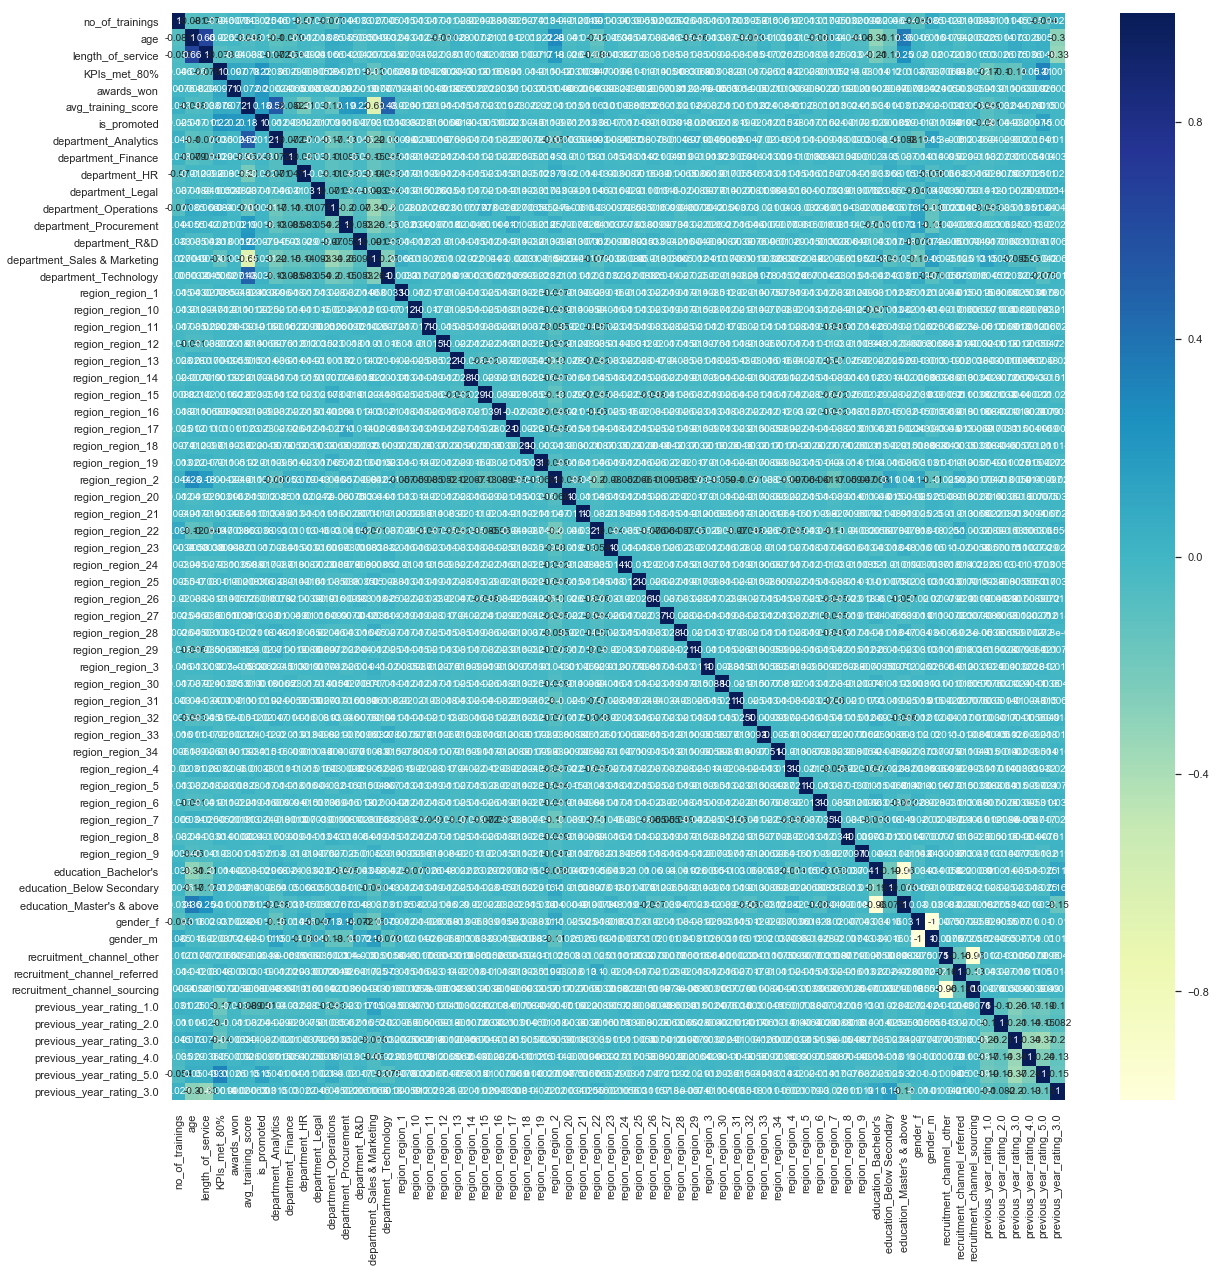

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(emp_data_corr,annot=True, cmap="YlGnBu")

In [195]:
# custom designed function
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.8)].index        
    X = X.append(df_y[df_y.between(-0.8,-0.1)].index)    
    return X

In [196]:
x_columns= extract_x_columns(emp_data['is_promoted'])

In [197]:
x_columns

Int64Index([], dtype='int64')

We will try to scale the values for SVM

In [198]:
Y = emp_data['is_promoted']
X = emp_data.drop(['is_promoted'], axis=1)



,no_of_trainings,age,length_of_service,KPIs_met_80%,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.0
0,1,35,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,30,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
2,1,34,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2,39,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,1,45,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
5,2,31,7,0,0,85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6,1,31,5,0,0,59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
7,1,33,6,0,0,63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
8,1,28,5,0,0,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
9,1,32,5,1,0,54,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0


In [203]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled_X = scaler.fit_transform(X.values)
X.head()
Y.head()


,no_of_trainings,age,length_of_service,KPIs_met_80%,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.0
0,1,35,8,1,0,49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,30,4,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
2,1,34,7,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2,39,10,0,0,50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,1,45,2,0,0,73,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.25, random_state=42, stratify=Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(41106, 63)

(13702, 63)

(41106,)

(13702,)

In [211]:
X_train
y_train

,no_of_trainings,age,length_of_service,KPIs_met_80%,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,previous_year_rating_3.0
50197,1,35,5,1,0,72,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
18646,2,27,4,1,0,77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
5416,1,40,4,0,0,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
15456,1,30,3,1,1,64,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
29116,1,36,10,0,0,86,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
17821,1,26,2,0,0,48,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
15926,1,42,6,0,0,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
39102,1,27,1,1,0,63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1
33181,1,31,5,0,0,63,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
23590,1,28,2,1,0,78,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


50197    0
18646    1
5416     0
15456    0
29116    0
17821    0
15926    0
39102    0
33181    0
23590    1
19294    0
43099    0
13039    0
47380    0
30326    0
6851     0
47973    0
1370     0
44491    0
23664    0
16717    0
14398    0
27992    0
16465    0
21067    0
15230    0
33390    0
21025    1
5211     0
30924    0
        ..
21756    0
23210    0
41503    0
1921     1
23207    0
51588    0
9681     0
17092    0
23430    0
31564    0
31934    0
773      0
9233     0
39282    0
27938    0
54240    0
52304    0
2457     1
48481    0
34923    1
3030     0
46882    0
25851    0
45037    0
51522    0
4220     0
24351    0
6986     1
9214     0
54230    0
Name: is_promoted, Length: 41106, dtype: int64

# Smote

In [213]:
unique, count = np.unique(y_smote, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 50140, 1: 50140}

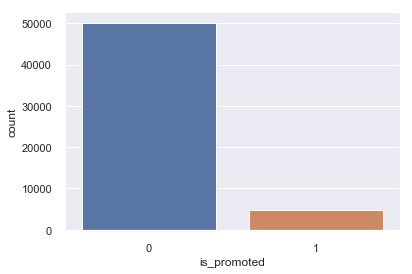

In [214]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="is_promoted", data=emp_data)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.svm import SVC
pipe = make_pipeline(
    SMOTE(),
    SVC()
)

weights = np.linspace(0.1, 1, 10)
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [215]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
sm = SMOTE(random_state=12, ratio = 1.0)
# X_train, X_test, y_train, y_test
# x_smote, y_smote = sm.fit_sample(X_train, y_train)
# x_smote_test, y_smote_test = sm.fit_sample(X_test,  y_test)
x_smote, y_smote =  sm.fit_sample(X, Y)

ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [208]:
unique, count = np.unique(y_smote, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 50140, 1: 50140}

In [144]:
pd.DataFrame(scaled_X).head()
x_smote

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.375,0.194444,1.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.250,0.083333,0.0,0.0,0.350000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.350,0.166667,0.0,0.0,0.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.111111,0.475,0.250000,0.0,0.0,0.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.625,0.027778,0.0,0.0,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


array([[ 1, 35,  5, ...,  0,  0,  0],
       [ 2, 27,  4, ...,  1,  0,  0],
       [ 1, 40,  4, ...,  0,  0,  0],
       ...,
       [ 1, 33,  9, ...,  0,  0,  0],
       [ 1, 57,  3, ...,  0,  0,  0],
       [ 1, 28,  2, ...,  0,  1,  0]], dtype=int64)

In [216]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(x_smote,y_smote) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [148]:
x_smote.shape

(75210, 63)

In [218]:
# y_pred = clf.predict(pd.DataFrame(y_smote_test))
y_pred = clf.predict(X_test)


In [217]:
from sklearn.model_selection import cross_val_score

score_knn = cross_val_score(clf, X_train, y_train, cv=4)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.92586106 0.92789023 0.925652   0.9270144 ]
Cross Validation Mean score : 0.9266044248217953


In [219]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.925193402423004

In [220]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12535
           1       1.00      0.12      0.22      1167

    accuracy                           0.93     13702
   macro avg       0.96      0.56      0.59     13702
weighted avg       0.93      0.93      0.90     13702



In [221]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12535,     0],
       [ 1025,   142]], dtype=int64)

In [42]:
# Parameters we want to test

Cs = [0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1]
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}  # 

In [43]:
param_grid

{'C': [0.01, 0.1, 1, 10],
 'gamma': [0.01, 0.1, 1],
 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [44]:
# Importing Grid Search 

from sklearn.model_selection import GridSearchCV

In [45]:
# Building the model
from sklearn.svm import SVC
# grid_clf = SVC(kernel = 'rbf')
grid_clf = SVC()
grid_search = GridSearchCV(grid_clf, param_grid, cv=3)

In [ ]:
import timeit
start = timeit.default_timer() 
grid_search.fit(X,Y )
stop = timeit.default_timer()

print('Time: ', stop - start) 